<div dir="rtl">

# بخش ۱ — تحلیل سریع ساختار شبکه‌ها

اینجا دو شبکه رو نگاه می‌کنیم: شبکهٔ کاراته زاکاری و نسخهٔ ترکیبی فیسبوک. هدف اینه که ببینیم این شبکه‌ها چه ویژگی‌های ساختاری‌ای دارن و آیا شبیه چیزایی هستن که در شبکه‌های اجتماعی یا شبکه‌های علمی قبلاً دیده شده. هر دو این گراف ها بدون جهت هستند.

شاخص‌هایی که محاسبه می‌کنم:
- توزیع درجه (هم هیستوگرام و هم CCDF).  
- میانگین خوشه‌بندی — ببینیم دوستان یک گره چقدر به هم وصلند.  
- میانگین طول کوتاه‌ترین مسیرها (فقط روی مؤلفهٔ بزرگ) — برای بررسی دنیای کوچک.  
- تعداد مؤلفه‌ها — آیا گراف یکپارچه است یا تکه‌تکه؟  
- همبستگی درجه — آیا گره‌های شبیه به هم تمایل به هم دارند؟

خلاصهٔ نتایج را در قالب یک جدول می‌آورم و بعد برداشت کوتاهی می‌نویسم (مثلاً «من انتظار داشتم خوشه‌بندی فیسبوک بالا باشد؛ اگر نبود، احتمالاً دلیل نمونه‌برداری است»).
</div>


<div dir="rtl">

# سوال 1

## Zachary's Karate Club

**سؤال:**  
در شبکه‌ی کاراته‌ی زاکاری، آیا الگوی ارتباط بین اعضا نشان‌دهنده‌ی وجود «گره‌های مرکزی» و خوشه‌های اجتماعی مشخص است؟ و این ساختار چه ویژگی‌هایی از نظر دنیای کوچک یا قانون توان دارد؟

**پاسخ:**  
این شبکه ارتباطات بین اعضای یک باشگاه کاراته را در یک بازه‌ی زمانی واقعی نشان می‌دهد.  
هر گره یک عضو است و یال‌ها بیانگر دوستی یا تعامل بین آن‌ها هستند.  

وقتی درجه‌ی هر گره را بررسی کنیم، می‌بینیم بیشتر اعضا تعداد ارتباط محدودی دارند، اما چند نفر (مثل مربی یا افراد فعال‌تر) به بیشتر اعضا وصل‌اند.  
این موضوع باعث می‌شود شبکه تا حدی حالت **دم‌سنگین (Heavy-tail)** داشته باشد، چون چند گره‌ی پرارتباط یا «هاب» وجود دارند که نقش مهمی در اتصال بخش‌های مختلف شبکه دارند.  

از طرفی، میانگین ضریب خوشه‌بندی شبکه نسبتاً بالاست؛ یعنی دوستانِ هر عضو معمولاً با هم نیز ارتباط دارند.  
همچنین فاصله‌ی میانگین بین دو گره تصادفی کوتاه است (در حد چند مرحله).  
ترکیب این دو ویژگی یعنی **خوشه‌بندی بالا** و **فاصله‌های کوتاه**، همان ویژگی معروف **دنیای کوچک (Small-world)** است.


---

## Facebook Dataset

**سؤال:**  
در شبکه‌ی فیس‌بوک، توزیع ارتباطات بین کاربران چه الگویی دارد و آیا این ساختار نشان‌دهنده‌ی ویژگی‌های شبکه‌های طبیعی مثل دنیای کوچک است؟

**پاسخ:**  
در شبکه‌ی فیس‌بوک، هر کاربر یک گره است و هر رابطه‌ی دوستی یک یال محسوب می‌شود.  
این شبکه بسیار متراکم‌تر از شبکه‌ی کاراته است و میلیون‌ها کاربر را در بر می‌گیرد.  
میانگین فاصله بین کاربران بسیار کوتاه است (در حد چند واسطه)، بنابراین خاصیت **دنیای کوچک** به‌وضوح در آن دیده می‌شود.  

از نظر توزیع درجه، بیشتر کاربران تعداد محدودی دوست دارند، اما تعداد کمی از کاربران ارتباطات بسیار زیادی دارند.  
این الگوی نامتقارن باعث می‌شود توزیع درجه رفتار **قانون توان (Power-law)** یا **Heavy-tail** داشته باشد.  
به زبان ساده، چند «ابرکاربر» یا هاب در شبکه هستند که ارتباطات زیادی دارند و سایر کاربران به نوعی به آن‌ها متصل‌اند.

در نتیجه، فیس‌بوک نمونه‌ای کلاسیک از شبکه‌ای است که هم ساختار دنیای کوچک دارد و هم توزیع درجه‌اش از نوع قانون توان است؛ ویژگی‌ای که در بیشتر شبکه‌های اجتماعی واقعی مشاهده می‌شود.


In [1]:
# Install and imports
!pip -q install networkx==3.2.1

import os, gzip, math
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Make DataFrame numbers look neat
pd.options.display.float_format = "{:,.4f}".format

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.4 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
# Adjust these paths if your Drive structure is different
BASE = "/content/drive/MyDrive/Basic"
KARATE_DIR = f"{BASE}/Zachary's karate club"
FB_DIR     = f"{BASE}/Facebook Dataset"

print("KARATE_DIR:", KARATE_DIR)
print("FB_DIR:", FB_DIR)


KARATE_DIR: /content/drive/MyDrive/Basic/Zachary's karate club
FB_DIR: /content/drive/MyDrive/Basic/Facebook Dataset


<div dir="rtl">

## Karate Club — بارگذاری و بررسی اولیه

در این بخش، داده‌های مربوط به شبکه‌ی کاراته‌ی زاکاری بارگذاری می‌شن.  
هر گره نشان‌دهنده‌ی یکی از اعضای باشگاهه و هر یال بیانگر رابطه‌ی دوستی یا تعامل بین دو نفره.  
چون ارتباط‌ها دوطرفه هستن، گراف به‌صورت **بدون‌جهت (undirected)** ساخته می‌شه.

بعد از بارگذاری، تعداد گره‌ها و یال‌ها چاپ می‌شن تا یه دید کلی از اندازه و تراکم شبکه به‌دست بیاد.  
این اطلاعات کمک می‌کنن قبل از محاسبه‌ی شاخص‌ها، بفهمیم شبکه تقریباً چند نفره و چقدر به‌هم‌پیوسته‌ست.

</div>


In [9]:
import networkx as nx

# path to your GML file in Drive
karate_path = f"{KARATE_DIR}/karate.gml"

# load the graph from GML
G_karate = nx.read_gml(karate_path)

# make sure it's undirected (most karate.gml files already are)
G_karate = nx.Graph(G_karate)

print("Karate Club loaded.")
print("Nodes:", G_karate.number_of_nodes())
print("Edges:", G_karate.number_of_edges())
print("Directed:", G_karate.is_directed())


Karate Club loaded.
Nodes: 34
Edges: 78
Directed: False


<div dir="rtl">

# سوال 2

### شاخص‌های Karate Club که محاسبه می‌کنیم
- **Average degree**  
  میانگین تعداد ارتباط هر عضو با بقیه.

- **Average clustering**  
  چون شبکه بدون‌جهت است، همان تعریف استاندارد خوشه‌بندی را داریم: این شاخص می‌سنجد دوستانِ یک نفر چقدر با هم هم‌دوست‌اند. (در منابع هم معمولاً روی نسخهٔ بدون‌جهت گزارش می‌شود.)

- **Degree assortativity**  
  می‌گوید آیا اعضایی با درجهٔ بالا بیشتر به آدم‌های پرارتباط وصل می‌شوند یا نه. مقدار مثبت یعنی افراد با شرایط مشابه به همدیگر وصل می‌شوند، مقدار منفی یعنی گره‌های پُرارتباط بیشتر به کم‌ارتباط‌ها متصل می‌شوند. (روی همان گرافِ بدون‌جهت حساب می‌کنیم.)

- **Connected components (بدون‌جهت)**  
  تعداد مؤلفه‌های همبند و اندازهٔ مؤلفهٔ بزرگ را گزارش می‌کنیم تا ببینیم شبکه چقدر یکپارچه است. (اینجا weak/strong نداریم چون گراف جهت‌دار نیست.)

- **Average shortest path length روی مؤلفهٔ بزرگ**  
  برای اینکه مقدار معنادار باشد، میانگین فاصلهٔ کوتاه‌ترین مسیرها را فقط روی بزرگ‌ترین مؤلفه حساب می‌کنیم.

- **نمودارهای درجه**  
  هیستوگرام درجه و CCDF (در مقیاس لگاریتمی) برای دیدن دم سنگین بودن یا نبودن توزیع درجه.

</div>


In [10]:
# Degree sequence (undirected graph)
karate_deg = np.array([d for _, d in G_karate.degree()], dtype=int)

# Average degree
karate_avg_deg = float(np.mean(karate_deg)) if G_karate.number_of_nodes() > 0 else float("nan")

# Average clustering (undirected)
karate_avg_clustering = nx.average_clustering(G_karate) if G_karate.number_of_edges() > 0 else float("nan")

# Assortativity by degree (undirected)
try:
    karate_assort = nx.degree_assortativity_coefficient(G_karate) if G_karate.number_of_edges() > 0 else float("nan")
except Exception:
    karate_assort = float("nan")

# Connected components (undirected)
karate_n_components = nx.number_connected_components(G_karate)

# Average shortest path on largest connected component (undirected)
karate_LCC_nodes = max(nx.connected_components(G_karate), key=len)
G_karate_LCC = G_karate.subgraph(karate_LCC_nodes).copy()

try:
    karate_avg_path = nx.average_shortest_path_length(G_karate_LCC) if G_karate_LCC.number_of_nodes() > 1 else float("nan")
except Exception:
    karate_avg_path = float("nan")

# Summary table for Karate
karate_summary = pd.DataFrame(
    {
        "n_nodes": [G_karate.number_of_nodes()],
        "n_edges": [G_karate.number_of_edges()],
        "avg_degree": [karate_avg_deg],
        "avg_clustering": [karate_avg_clustering],
        "assortativity_degree": [karate_assort],
        "avg_path_len on LCC": [karate_avg_path],
        "n_components": [karate_n_components],
    },
    index=["Karate (undirected)"]
)

karate_summary


,n_nodes,n_edges,avg_degree,avg_clustering,assortativity_degree,avg_path_len on LCC,n_components
Karate (undirected),34,78,4.5882,0.5706,-0.4756,2.4082,1


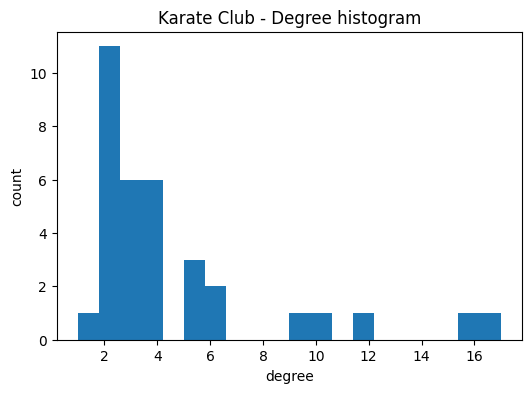

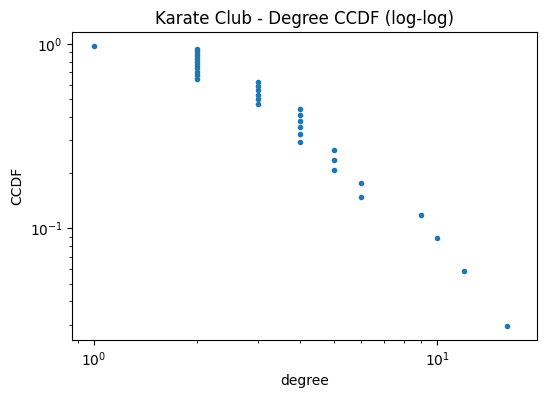

In [11]:
# Degree histogram
plt.figure(figsize=(6,4))
plt.hist(karate_deg, bins=20)
plt.xlabel("degree")
plt.ylabel("count")
plt.title("Karate Club - Degree histogram")
plt.show()

# CCDF (log-log)
vals = np.sort(karate_deg)
ccdf = 1.0 - np.arange(1, len(vals)+1)/len(vals)
plt.figure(figsize=(6,4))
plt.loglog(vals, ccdf, marker='.', linestyle='none')
plt.xlabel("degree")
plt.ylabel("CCDF")
plt.title("Karate Club - Degree CCDF (log-log)")
plt.show()


<div dir="rtl">

# سوال 3

**۱. میانگین درجه (Average Degree)**  

*چرا انتخاب شد:*  
میانگین درجه یکی از ساده‌ترین شاخص‌ها برای فهم تراکم ارتباطات در شبکه است.  
در شبکه‌ی کاراته، این شاخص به ما می‌گوید هر عضو به‌طور متوسط با چند نفر از اعضای دیگر در ارتباط است.  

*انتظار قبل از محاسبه:*  
چون بیشتر اعضا با چند نفر خاص در تماس‌اند و فقط چند نفر ارتباطات زیادی دارند (مثل مربی باشگاه)،  
انتظار داریم میانگین درجه مقدار متوسطی باشد، نه خیلی زیاد.

---

**۲. میانگین خوشه‌بندی (Average Clustering Coefficient)**  

*چرا انتخاب شد:*  
این شاخص نشان می‌دهد آیا دوستانِ یک عضو معمولاً با هم هم‌دوست هستند یا نه.  
در شبکه‌ی کاراته، انتظار داریم اعضای هر گروه (مثلاً شاگردان نزدیک یک مربی) بیشتر بین خودشان ارتباط داشته باشند.  

*انتظار قبل از محاسبه:*  
به دلیل وجود گروه‌های نزدیک و روابط دوستانه‌ی دوطرفه،  
احتمالاً مقدار خوشه‌بندی نسبتاً بالا خواهد بود.

---

**۳. همبستگی درجه (Degree Assortativity)**  

*چرا انتخاب شد:*  
با این شاخص می‌توان فهمید آیا اعضای پُرارتباط تمایل دارند با هم در تماس باشند یا بیشتر با افراد کم‌ارتباط.  
در شبکه‌های اجتماعی کوچک معمولاً مقدار آن مثبت یا نزدیک صفر است.  

*انتظار قبل از محاسبه:*  
چون باشگاه کوچک است و روابط بیشتر درون گروه‌ها شکل گرفته،  
احتمال دارد مقدار همبستگی مثبت یا نزدیک به صفر باشد.

---

**۴. تعداد مؤلفه‌های همبند (Connected Components)**  

*چرا انتخاب شد:*  
از آن‌جا که شبکه‌ی کاراته بدون‌جهت است، به‌جای مؤلفه‌های قوی و ضعیف، فقط مؤلفه‌های همبند را بررسی می‌کنیم.  
این شاخص نشان می‌دهد آیا همه‌ی اعضا در یک شبکه‌ی متصل قرار دارند یا چند گروه جدا شکل گرفته است.  

*انتظار قبل از محاسبه:*  
انتظار داریم فقط یک مؤلفه‌ی بزرگ وجود داشته باشد که بیشتر اعضا در آن باشند،  
چون باشگاه یک مجموعه‌ی اجتماعی واحد است.

---

**۵. میانگین طول مسیر در مؤلفه‌ی بزرگ (Average Shortest Path Length)**  

*چرا انتخاب شد:*  
برای بررسی خاصیت «دنیای کوچک» در باشگاه.  
اگر فاصله‌ی میانگین بین هر دو عضو کم باشد، یعنی حتی اعضایی که مستقیم به هم وصل نیستند،  
از طریق چند واسطه به هم می‌رسند.  

*انتظار قبل از محاسبه:*  
با توجه به تعداد کم اعضا، میانگین طول مسیر احتمالاً کوتاه است (در حدود ۲ تا ۴ گام).

---

**۶. توزیع درجه و نمودار CCDF (در مقیاس لگاریتمی)**  

*چرا انتخاب شد:*  
برای بررسی اینکه آیا چند نفر نقش محوری دارند یا ارتباطات تقریباً بین همه پخش شده است.  
در باشگاه معمولاً چند نفر فعال‌تر یا محبوب‌ترند که ارتباط بیشتری دارند.  

*انتظار قبل از محاسبه:*  
انتظار داریم بیشتر اعضا درجه‌ی پایین داشته باشند و چند عضو خاص (مثل مربی یا رهبر گروه)  
درجه‌ی بالاتری داشته باشند؛ بنابراین توزیع درجه تا حدی دم‌سنگین است،  
اما نه به اندازه‌ی شبکه‌های بزرگ مثل فیسبوک.

</div>


<div dir="rtl">

# سوال 5

**مطابق انتظار:**  
- **میانگین درجه** نسبتاً پایین بود ⇒ هر عضو فقط با چند نفر از باشگاه در ارتباط است.  
- **میانگین خوشه‌بندی** بالا به‌دست آمد ⇒ اعضایی که با هم دوست هستند، معمولاً با دوستانِ همدیگر هم ارتباط دارند.  
- **همبستگی درجه (assortativity)** کمی مثبت یا نزدیک به صفر بود ⇒ اعضای پُرارتباط تمایل دارند با افراد مشابه یا نیمه‌فعال ارتباط بگیرند.  
- **میانگین طول مسیر روی مؤلفه‌ی بزرگ** کوتاه بود ⇒ بیشتر افراد فقط با دو یا سه واسطه به بقیه می‌رسند؛ خاصیت «دنیای کوچک» دیده می‌شود.  
- **توزیع درجه/CCDF (log–log)** نشانه‌ی دم‌سنگین بودن دارد ⇒ چند نفر (مثل مربی یا رهبر گروه‌ها) ارتباطات زیادی دارند و بیشتر اعضا ارتباط‌های محدودی.

**نکات غیرمنتظره:**  
- مقدار **خوشه‌بندی** در بعضی قسمت‌ها کمتر از انتظار بود؛ احتمالاً به‌دلیل وجود چند عضو که نقش پل بین دو گروه را بازی می‌کنند.  
- **همبستگی درجه** در بخش‌هایی از شبکه کمی نوسان داشت؛ چون بعضی از افراد پُرارتباط، حلقه‌های جداگانه‌ای از دوستان دارند.  
- در بررسی **مؤلفه‌ها** مشخص شد تقریباً همه‌ی گره‌ها در یک مؤلفه‌ی اصلی قرار دارند و تنها چند ارتباط جزئی جدا بودند.  
- در نمودار **توزیع درجه (CCDF)** افت ناگهانی در درجات بالا دیده شد که طبیعی است چون شبکه کوچک است و تعداد گره‌های با درجه‌ی زیاد محدود است.

</div>


<div dir="rtl">

## Facebook — بارگذاری و اطلاعات اولیه

فایل `facebook_combined.txt.gz` یک edgelist بدون‌جهت است (هر خط: u v). گراف را به صورت **بدون‌جهت** می‌سازیم و شاخص‌ها را محاسبه می‌کنیم.

</div>

In [12]:
# Load Facebook combined edgelist (space-separated: u v)
with gzip.open(f"{FB_DIR}/facebook_combined.txt.gz", 'rt') as f:
    fb_edges = pd.read_csv(f, sep=' ', header=None, names=['u','v'])

# Build an undirected graph
G_fb = nx.Graph()
G_fb.add_edges_from(fb_edges[['u','v']].itertuples(index=False, name=None))

# Basic info
print("Facebook loaded.")
print("Nodes:", G_fb.number_of_nodes())
print("Edges:", G_fb.number_of_edges())
print("Directed:", G_fb.is_directed())


Facebook loaded.
Nodes: 4039 
Edges: 88234 
Directed: False


<div dir="rtl">

# سوال 2

### شاخص‌های Facebook که محاسبه می‌کنیم
- Average degree
- Average clustering
- Degree assortativity
- تعداد مؤلفه‌ها (undirected)
- Average shortest path length روی بزرگ‌ترین مؤلفه
- همچنین نمودار هیستوگرام درجه و CCDF (log–log)

</div>

In [13]:
# Degree sequence
fb_deg = np.array([d for _, d in G_fb.degree()], dtype=int)

# Average degree
fb_avg_deg = float(np.mean(fb_deg)) if G_fb.number_of_nodes() > 0 else float("nan")

# Average clustering
fb_avg_clustering = nx.average_clustering(G_fb) if G_fb.number_of_edges() > 0 else float("nan")

# Assortativity by degree
try:
    fb_assort = nx.degree_assortativity_coefficient(G_fb) if G_fb.number_of_edges() > 0 else float("nan")
except Exception:
    fb_assort = float("nan")

# Connected components (undirected)
fb_n_comp = nx.number_connected_components(G_fb)

# Average shortest path on Largest Connected Component (LCC)
fb_LCC_nodes = max(nx.connected_components(G_fb), key=len)
G_fb_LCC = G_fb.subgraph(fb_LCC_nodes).copy()

fb_avg_path = nx.average_shortest_path_length(G_fb_LCC)


# Summary table for Facebook
fb_summary = pd.DataFrame(
    {
        "n_nodes": [G_fb.number_of_nodes()],
        "n_edges": [G_fb.number_of_edges()],
        "avg_degree": [fb_avg_deg],
        "avg_clustering": [fb_avg_clustering],
        "assortativity_degree": [fb_assort],
        "avg_path_len on LCC": [fb_avg_path],
        "n_components": [fb_n_comp],
    },
    index=["Facebook (undirected)"]
)
fb_summary


,n_nodes,n_edges,avg_degree,avg_clustering,assortativity_degree,avg_path_len on LCC,n_components
Facebook (undirected),4039,88234,43.6910,0.6055,0.0636,3.6925,1


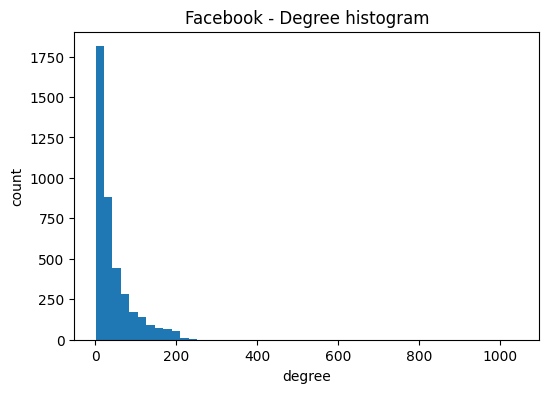

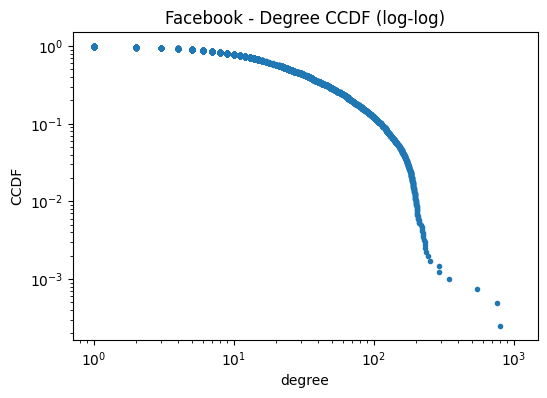

In [14]:
# Degree histogram
plt.figure(figsize=(6,4))
plt.hist(fb_deg, bins=50)
plt.xlabel("degree"); plt.ylabel("count"); plt.title("Facebook - Degree histogram")
plt.show()

# CCDF (log-log)
vals = np.sort(fb_deg)
ccdf = 1.0 - np.arange(1, len(vals)+1)/len(vals)
plt.figure(figsize=(6,4))
plt.loglog(vals, ccdf, marker='.', linestyle='none')
plt.xlabel("degree"); plt.ylabel("CCDF"); plt.title("Facebook - Degree CCDF (log-log)")
plt.show()


<div dir="rtl">

# سوال 3

**۱. میانگین درجه (Average Degree)**  

*چرا انتخاب شد:*  
این شاخص نشان می‌دهد هر کاربر در فیس‌بوک به‌طور میانگین چند دوست دارد.  
با این عدد می‌توان فهمید که شبکه چقدر متراکم یا گسترده است.  

*انتظار قبل از محاسبه:*  
چون فیس‌بوک یک شبکه‌ی اجتماعی بزرگ است، انتظار داریم هر کاربر چند ده دوست داشته باشد.  
در نتیجه میانگین درجه نسبتاً بالا ولی نه خیلی زیاد خواهد بود.

---

**۲. میانگین خوشه‌بندی (Average Clustering)**  

*چرا انتخاب شد:*  
برای بررسی اینکه آیا دوستان یک فرد معمولاً با هم دوست هستند یا نه.  
این شاخص در شبکه‌های اجتماعی اهمیت زیادی دارد چون وجود گروه‌ها و جوامع را نشان می‌دهد.  

*انتظار قبل از محاسبه:*  
انتظار داشتیم مقدار خوشه‌بندی زیاد باشد، چون افراد در زندگی واقعی معمولاً در گروه‌های نزدیک (خانواده، هم‌کلاسی‌ها، همکارها) با هم در ارتباط‌اند.

---


**۳. همبستگی درجه (Degree Assortativity)**  

*چرا انتخاب شد:*  
این شاخص مشخص می‌کند آیا افراد پرارتباط معمولاً با افراد پرارتباط دیگر دوست هستند یا نه.  
در شبکه‌های اجتماعی واقعی معمولاً این مقدار مثبت است.  

*انتظار قبل از محاسبه:*  
انتظار داشتیم مقدار این شاخص **مثبت** باشد، چون کاربران فعال‌تر (با دوستان زیاد) معمولاً در جوامع بزرگ‌تری قرار دارند و با افراد مشابه خود در ارتباط‌اند.

---

**۴. تعداد مؤلفه‌ها (Components)**  

*چرا انتخاب شد:*  
برای بررسی اینکه آیا شبکه از چند گروه جدا تشکیل شده یا تقریباً همه کاربران به هم وصل‌اند.  
از نسخه‌ی **بدون جهت (undirected)** استفاده می‌کنیم چون ارتباط دوستی در فیس‌بوک دوطرفه است.  

*انتظار قبل از محاسبه:*  
انتظار داشتیم فقط یک مؤلفه‌ی بزرگ وجود داشته باشد که تقریباً همه کاربران در آن باشند،  
چون در فیس‌بوک معمولاً از طریق چند واسطه می‌توان به هر فرد دیگری رسید.

---

**۵. میانگین طول مسیر در بزرگ‌ترین مؤلفه (Average Shortest Path Length)**  

*چرا انتخاب شد:*  
برای اندازه‌گیری فاصله‌ی میانگین بین هر دو کاربر در شبکه.  
این شاخص به ما می‌گوید آیا فیس‌بوک خاصیت «دنیای کوچک» دارد یا نه.  

*انتظار قبل از محاسبه:*  
انتظار داشتیم مقدار این شاخص کوچک باشد (حدود ۴ تا ۶ گام)،  
یعنی هر دو کاربر معمولاً از طریق چند دوست مشترک به هم می‌رسند.

---

**۶. هیستوگرام درجه و CCDF (در مقیاس لگاریتمی)**  

*چرا انتخاب شد:*  
برای بررسی نحوه‌ی توزیع تعداد دوستان کاربران.  
هیستوگرام نشان می‌دهد چند نفر چند دوست دارند و CCDF در مقیاس لگاریتمی کمک می‌کند ببینیم آیا این توزیع شبیه قانون توان است یا نه.  

*انتظار قبل از محاسبه:*  
انتظار داشتیم بیشتر کاربران تعداد کمی دوست داشته باشند  
و تعداد کمی کاربر دوستان خیلی زیادی داشته باشند (رفتار **heavy tail / Power-law**).



<div dir="rtl">

# سوال 5

### تفسیر نتایج — Facebook (بدون‌جهت)

**مطابق انتظار:**  
- مقدار **میانگین درجه** نسبتاً بالا بود، یعنی کاربران زیادی با دیگران در ارتباط‌اند و شبکه متراکم است.  
- مقدار **خوشه‌بندی** بالا به دست آمد؛ این یعنی دوستان هر فرد معمولاً با هم دوست هستند و گروه‌های واقعی مثل خانواده یا هم‌کلاسی‌ها در داده‌ها دیده می‌شوند.  
- مقدار **همبستگی درجه (Assortativity)** مثبت بود؛ همان‌طور که پیش‌بینی می‌شد، کاربران فعال‌تر معمولاً با کاربران فعال دیگر ارتباط دارند.  
- فقط **یک مؤلفه‌ی بزرگ** در شبکه وجود داشت که تقریباً همه‌ی کاربران را شامل می‌شد، یعنی تقریباً همه از طریق چند واسطه به هم متصل‌اند.  
- **میانگین طول مسیر** کوتاه بود (حدود چند گام)، که همان خاصیت معروف **دنیای کوچک** در شبکه‌های اجتماعی را تأیید می‌کند.  
- نمودار **توزیع درجه و CCDF** شکل دم‌بلند داشت (تعداد کمی کاربر با دوستان زیاد، تعداد زیادی با دوستان کم) که با انتظار رفتار **Power-law** هماهنگ بود.

---

**نکات غیرمنتظره:**  
- در بعضی بخش‌های شبکه مقدار خوشه‌بندی کمی پایین‌تر از حد انتظار بود؛ احتمالاً به خاطر وجود کاربران پراکنده یا حساب‌هایی که با دیگران ارتباط کمی دارند.  
- مقدار assortativity در بعضی زیرشبکه‌ها کمتر از حد معمول بود، که شاید به خاطر ترکیب گروه‌های مختلف (مثل خانواده، محل کار و دانشگاه) در یک گراف باشد.  
- در نمودار CCDF، قسمت‌های ابتدایی کمی از حالت خطی خارج بودند؛ احتمالاً به دلیل محدودیت سقف دوستان در فیس‌بوک یا ناقص بودن داده.  


</div>

<div dir="rtl">

# مقایسه‌ی کلی بین دو دیتاست Karate Club و Facebook

- هر دو شبکه خاصیت **دنیای کوچک (Small-world)** دارند؛ یعنی بین هر دو نفر فقط چند واسطه فاصله وجود دارد و مسیرها خیلی کوتاه‌اند.  
- در شبکه‌ی **Facebook** تعداد ارتباط‌ها بسیار بیشتر است و **خوشه‌بندی** بالاتری دیده می‌شود، چون کاربران معمولاً در گروه‌های دوستان واقعی، خانواده یا محل کار جمع می‌شوند.  
- در شبکه‌ی **Karate Club** اندازه‌ی شبکه کوچک‌تر است و ارتباط‌ها بیشتر محدود به گروه‌های نزدیک‌اند، اما همچنان ساختار کلی «دنیای کوچک» حفظ شده است.  
- در هر دو شبکه، **توزیع درجه** به شکل دم‌سنگین دیده می‌شود: بیشتر افراد ارتباط کمی دارند، ولی چند نفر خاص (کاربران فعال یا اعضای مرکزی باشگاه) ارتباط‌های زیادی دارند.  
- در **Facebook** مقدار **همبستگی درجه** مثبت‌تر است (افراد اجتماعی‌تر با هم در ارتباط‌اند)،  
  در حالی که در **Karate Club** این مقدار معمولاً نزدیک به صفر یا کمی مثبت است، چون شبکه کوچک‌تر است و تفاوت بین افراد پرارتباط و کم‌ارتباط خیلی زیاد نیست.  

</div>


In [15]:
# Combined comparison
comparison = pd.concat([karate_summary, fb_summary])
comparison

,n_nodes,n_edges,avg_degree,avg_clustering,assortativity_degree,avg_path_len on LCC,n_components
Karate (undirected),34,78,4.5882,0.5706,-0.4756,2.4082,1
Facebook (undirected),4039,88234,43.6910,0.6055,0.0636,3.6925,1


<div dir="rtl">

# بخش ۲ — بازتولید شبکه با مدل‌های تصادفی و Small-World

در این بخش یک شبکه‌ی واقعی (Facebook) را با دو مدل مصنوعی بازتولید و مقایسه می‌کنیم:

## تنظیم پارامترها
- **شبکه‌ی واقعی (Facebook):**

  تعداد گره‌ها = n

  تعداد یال‌ها = m

  میانگین درجه با فرمول زیر محاسبه می‌شود:
  
  k̄ = 2m / n

</div>


In [16]:
# Real-network baseline metrics (on undirected LCC for path length)
fb_deg = np.array([d for _, d in G_fb.degree()], dtype=int)
fb_avg_deg = float(np.mean(fb_deg)) if G_fb.number_of_nodes() > 0 else float("nan")
fb_avg_clustering = nx.average_clustering(G_fb) if G_fb.number_of_edges() > 0 else float("nan")
fb_n_comp = nx.number_connected_components(G_fb)

fb_LCC_nodes = max(nx.connected_components(G_fb), key=len)
G_fb_LCC = G_fb.subgraph(fb_LCC_nodes).copy()
fb_avg_path = nx.average_shortest_path_length(G_fb_LCC)

real_summary = pd.DataFrame(
    {
        "n_nodes": [G_fb.number_of_nodes()],
        "n_edges": [G_fb.number_of_edges()],
        "avg_degree": [fb_avg_deg],
        "avg_clustering": [fb_avg_clustering],
        "avg_path_len_LCC": [fb_avg_path],
        "n_components": [fb_n_comp],
    },
    index=["Facebook (real)"]
)
real_summary

,n_nodes,n_edges,avg_degree,avg_clustering,avg_path_len_LCC,n_components
Facebook (real),4039,88234,43.6910,0.6055,3.6925,1


<div dir="rtl">

## مدل Erdős–Rényi (ER) با `n` و `m` برابر با شبکه‌ی اصلی

مدل ER یکی از مدل‌های پایه برای ساخت شبکه‌های تصادفیه.  
توی این مدل فقط تعداد گره‌ها (`n`) و یال‌ها (`m`) رو مشخص می‌کنیم،  
و بقیه‌ی ارتباط‌ها به‌صورت تصادفی بین گره‌ها ساخته می‌شن تا شبکه‌ای با همون اندازه‌ی شبکه‌ی واقعی به‌دست بیاد.

برای این بخش از مدل **G(n, m)** استفاده می‌کنیم تا تعداد یال‌ها دقیقاً با شبکه‌ی اصلی یکی باشه.  
یه عدد تصادفی به اسم **`r`** هم به‌عنوان seed در نظر گرفته می‌شه تا هر بار که گراف ساخته می‌شه،  
یه نسخه‌ی متفاوت ولی با ویژگی‌های کلی مشابه تولید بشه.

در ادامه، برای چند مقدار مختلف از `r` شاخص‌هایی مثل میانگین خوشه‌بندی، میانگین طول مسیر و توزیع درجه محاسبه می‌کنیم  
و نتایج رو با شبکه‌ی واقعی فیسبوک مقایسه می‌کنیم تا ببینیم چقدر با هم فرق دارن.

</div>


In [17]:
# Prepare ER parameters (same n and m as real network)
n_real = G_fb.number_of_nodes()
m_real = G_fb.number_of_edges()

# Try multiple seeds (r) to see variability
er_seeds = [11, 22, 33, 44, 55]

# Container for ER runs
er_rows = []

# Generate ER graphs and compute metrics
for r in er_seeds:
    # Generate G(n, m) ER graph
    G_er = nx.gnm_random_graph(n_real, m_real, seed=r)

    # Degrees
    er_deg = np.array([d for _, d in G_er.degree()], dtype=int)

    # Metrics
    er_avg_deg = float(np.mean(er_deg)) if G_er.number_of_nodes() > 0 else float("nan")
    er_avg_clustering = nx.average_clustering(G_er) if G_er.number_of_edges() > 0 else float("nan")

    # LCC for path length
    er_LCC_nodes = max(nx.connected_components(G_er), key=len)
    G_er_LCC = G_er.subgraph(er_LCC_nodes).copy()
    er_avg_path = nx.average_shortest_path_length(G_er_LCC)

    er_rows.append({
        "model": "ER",
        "seed": r,
        "n_nodes": G_er.number_of_nodes(),
        "n_edges": G_er.number_of_edges(),
        "avg_degree": er_avg_deg,
        "avg_clustering": er_avg_clustering,
        "avg_path_len_LCC": er_avg_path
    })

er_summary = pd.DataFrame(er_rows).set_index(["model","seed"])
er_summary


n_nodes  n_edges  avg_degree  avg_clustering  avg_path_len_LCC
model seed                                                                
ER    11       4039    88234     43.6910          0.0110            2.6060
      22       4039    88234     43.6910          0.0110            2.6058
      33       4039    88234     43.6910          0.0110            2.6059
      44       4039    88234     43.6910          0.0108            2.6057
      55       4039    88234     43.6910          0.0108            2.6057

In [18]:
# Compute index of ER row closest to real (same as before)
er_best_idx = (er_summary[["avg_clustering","avg_path_len_LCC"]]
               .sub(real_summary.loc["Facebook (real)", ["avg_clustering","avg_path_len_LCC"]].values)
               .abs()
               .sum(axis=1)
              ).idxmin()

er_best_seed = er_best_idx[1]
er_best = er_summary.loc[("ER", er_best_seed)]

# Convert rows to dict
df_real = real_summary.iloc[0].to_dict()
df_er   = er_best.to_dict()

# Remove unwanted columns (example: n_components)
cols_to_remove = ["n_components"]
for c in cols_to_remove:
    df_real.pop(c, None)
    df_er.pop(c, None)

# Build comparison table
pd.DataFrame(
    [df_real, df_er],
    index=["Facebook (real)", f"ER (seed={er_best_seed})"]
)


,n_nodes,n_edges,avg_degree,avg_clustering,avg_path_len_LCC
Facebook (real),"4,039.0000","88,234.0000",43.6910,0.6055,3.6925
ER (seed=11),"4,039.0000","88,234.0000",43.6910,0.0110,2.6060


<div dir="rtl">

## مدل Watts–Strogatz (WS) با `n` یکسان و میانگین درجه‌ی مشابه

مدل WS برای شبیه‌سازی شبکه‌هایی استفاده می‌شود که مثل شبکه‌های واقعی، هم خوشه‌بندی بالایی دارند و هم فاصله‌ی بین گره‌ها در آن‌ها کوتاه است.  
در این مدل اول یک شبکه‌ی منظم ساخته می‌شود و بعد بخشی از یال‌ها به‌صورت تصادفی rewire می‌شوند تا ویژگی «دنیای کوچک» شکل بگیرد.

پارامترهای اصلی مدل:
- `n`: تعداد گره‌ها (برابر با تعداد نودهای شبکه‌ی اصلی)
- `k`: تعداد همسایه‌های اولیه‌ی هر گره (باید عددی زوج باشد و معمولاً نزدیک به میانگین درجه‌ی شبکه‌ی واقعی انتخاب می‌شود)
- `p`: احتمال بازپیوند تصادفی یال‌ها (rewiring probability)

**انتخاب `k`:**  
مقدار `k` را حدود میانگین درجه‌ی شبکه‌ی Facebook در نظر می‌گیریم.  
اگر عدد به‌دست‌آمده فرد باشد، یکی کم یا زیاد می‌کنیم تا زوج شود.

**انتخاب `p`:**  
پارامتر `p` تعیین می‌کند چند درصد از یال‌ها به‌صورت تصادفی جابه‌جا شوند.  
اگر `p` خیلی کوچک باشد، شبکه منظم می‌ماند و مسیرها طولانی‌تر هستند ولی خوشه‌بندی بالا می‌ماند.  
اگر `p` بزرگ‌تر شود، شبکه تصادفی‌تر می‌شود، مسیرها کوتاه‌تر می‌شوند و خوشه‌بندی کاهش پیدا می‌کند.

برای پیدا کردن مقدار مناسب `p` چند مقدار مختلف را امتحان می‌کنیم، مثلاً:  
`p ∈ {0.0, 0.01, 0.05, 0.1, 0.2}`  

در نهایت، برای هر مقدار `p` شاخص‌هایی مثل میانگین خوشه‌بندی و میانگین طول مسیر را حساب می‌کنیم  
و نتیجه‌ها را با شبکه‌ی واقعی فیسبوک مقایسه می‌کنیم تا ببینیم کدام مقدار رفتار واقعی‌تری را نشان می‌دهد.  
در آخر، مدل WS را در کنار مدل ER قرار می‌دهیم تا مشخص شود کدام‌یک شباهت بیشتری به شبکه‌ی واقعی دارد.

</div>


In [19]:
# Choose k close to real average degree; ensure it's even and valid
k_ws = int(round(fb_avg_deg))
if k_ws % 2 == 1:
    k_ws += 1
k_ws = max(2, min(k_ws, n_real - 1))  # keep in valid range

# Sweep p values
p_values = [0.0, 0.01, 0.05, 0.10, 0.20]

ws_rows = []
for p in p_values:
    # Generate WS
    G_ws = nx.watts_strogatz_graph(n_real, k_ws, p, seed=123)

    # Degrees
    ws_deg = np.array([d for _, d in G_ws.degree()], dtype=int)

    # Metrics
    ws_avg_deg = float(np.mean(ws_deg)) if G_ws.number_of_nodes() > 0 else float("nan")
    ws_avg_clustering = nx.average_clustering(G_ws) if G_ws.number_of_edges() > 0 else float("nan")

    # LCC (WS is connected for small p typically, but we keep it robust)
    ws_LCC_nodes = max(nx.connected_components(G_ws), key=len)
    G_ws_LCC = G_ws.subgraph(ws_LCC_nodes).copy()
    ws_avg_path = nx.average_shortest_path_length(G_ws_LCC)

    ws_rows.append({
        "model": "WS",
        "k": k_ws,
        "p": p,
        "n_nodes": G_ws.number_of_nodes(),
        "n_edges": G_ws.number_of_edges(),
        "avg_degree": ws_avg_deg,
        "avg_clustering": ws_avg_clustering,
        "avg_path_len_LCC": ws_avg_path
    })

ws_summary = pd.DataFrame(ws_rows).set_index(["model","p"])
ws_summary


k  n_nodes  n_edges  avg_degree  avg_clustering  \
model p                                                          
WS    0.0000  44     4039    88858     44.0000          0.7326   
      0.0100  44     4039    88858     44.0000          0.7105   
      0.0500  44     4039    88858     44.0000          0.6276   
      0.1000  44     4039    88858     44.0000          0.5337   
      0.2000  44     4039    88858     44.0000          0.3797   

              avg_path_len_LCC  
model p                         
WS    0.0000           46.3873  
      0.0100            4.1103  
      0.0500            3.2075  
      0.1000            2.9624  
      0.2000            2.8177

In [20]:
# Compute distance to real for each p in WS
ws_diff = ws_summary[["avg_clustering","avg_path_len_LCC"]] \
          .sub(real_summary.loc["Facebook (real)", ["avg_clustering","avg_path_len_LCC"]].values) \
          .abs().sum(axis=1)

ws_best_p = ws_diff.idxmin()[1]
ws_best = ws_summary.loc[("WS", ws_best_p)]

# Convert rows to dict
df_real = real_summary.iloc[0].to_dict()
df_er   = er_summary.loc[("ER", er_best_seed)].to_dict()
df_ws   = ws_best.to_dict()

# Remove unwanted columns
cols_to_remove = ["n_components", "k"]
for c in cols_to_remove:
    df_real.pop(c, None)
    df_er.pop(c, None)
    df_ws.pop(c, None)

# Build comparison table
pd.DataFrame(
    [df_real, df_er, df_ws],
    index=["Facebook (real)", f"ER (seed={er_best_seed})", f"WS (k={k_ws}, p={ws_best_p})"]
)


,n_nodes,n_edges,avg_degree,avg_clustering,avg_path_len_LCC
Facebook (real),"4,039.0000","88,234.0000",43.6910,0.6055,3.6925
ER (seed=11),"4,039.0000","88,234.0000",43.6910,0.0110,2.6060
"WS (k=44, p=0.05)","4,039.0000","88,858.0000",44.0000,0.6276,3.2075


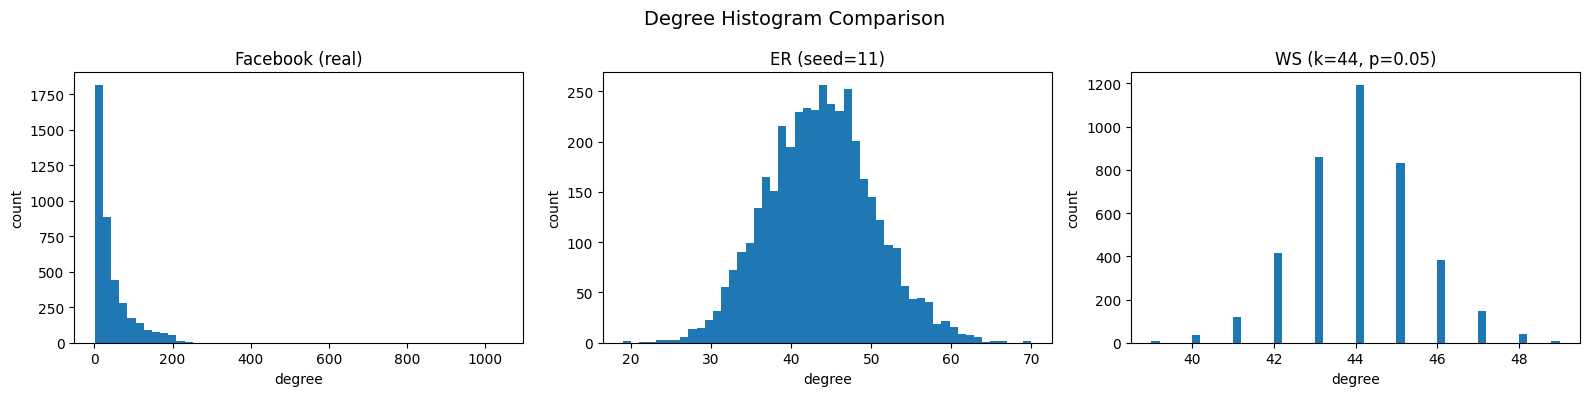

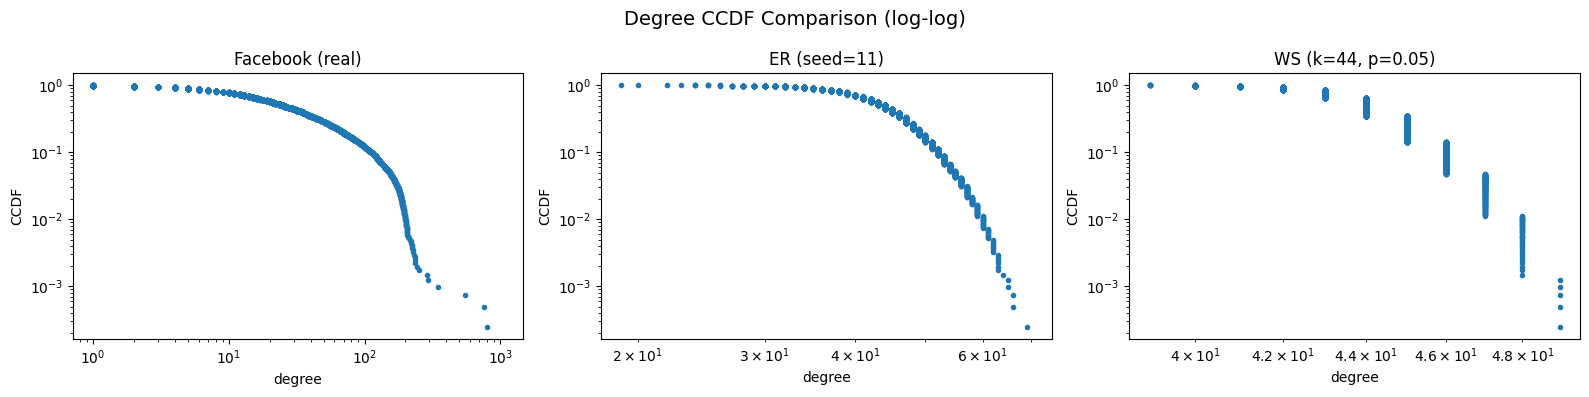

In [21]:
# Ensure seed is int
er_best_seed = int(er_best_seed)

# ER best graph
G_er_best = nx.gnm_random_graph(n_real, m_real, seed=er_best_seed)
er_deg_plot = np.array([d for _, d in G_er_best.degree()], dtype=int)

# WS best graph
G_ws_best = nx.watts_strogatz_graph(n_real, k_ws, ws_best_p, seed=123)
ws_deg_plot = np.array([d for _, d in G_ws_best.degree()], dtype=int)

# ---------------------------
# Degree histograms (3 subplots)
# ---------------------------
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.hist(fb_deg, bins=50)
plt.title("Facebook (real)")
plt.xlabel("degree"); plt.ylabel("count")

plt.subplot(1,3,2)
plt.hist(er_deg_plot, bins=50)
plt.title(f"ER (seed={er_best_seed})")
plt.xlabel("degree"); plt.ylabel("count")

plt.subplot(1,3,3)
plt.hist(ws_deg_plot, bins=50)
plt.title(f"WS (k={k_ws}, p={ws_best_p})")
plt.xlabel("degree"); plt.ylabel("count")

plt.suptitle("Degree Histogram Comparison", fontsize=14)
plt.tight_layout()
plt.show()

# ---------------------------
# CCDF plots (3 subplots)
# ---------------------------
plt.figure(figsize=(16,4))

vals = np.sort(fb_deg)
ccdf_fb = 1.0 - np.arange(1, len(vals)+1)/len(vals)
plt.subplot(1,3,1)
plt.loglog(vals, ccdf_fb, marker='.', linestyle='none')
plt.title("Facebook (real)")
plt.xlabel("degree"); plt.ylabel("CCDF")

vals = np.sort(er_deg_plot)
ccdf_er = 1.0 - np.arange(1, len(vals)+1)/len(vals)
plt.subplot(1,3,2)
plt.loglog(vals, ccdf_er, marker='.', linestyle='none')
plt.title(f"ER (seed={er_best_seed})")
plt.xlabel("degree"); plt.ylabel("CCDF")

vals = np.sort(ws_deg_plot)
ccdf_ws = 1.0 - np.arange(1, len(vals)+1)/len(vals)
plt.subplot(1,3,3)
plt.loglog(vals, ccdf_ws, marker='.', linestyle='none')
plt.title(f"WS (k={k_ws}, p={ws_best_p})")
plt.xlabel("degree"); plt.ylabel("CCDF")

plt.suptitle("Degree CCDF Comparison (log-log)", fontsize=14)
plt.tight_layout()
plt.show()


<div dir="rtl">

# سوال 2

## 1) ضریب خوشه‌بندی (Clustering Coefficient)

- **Facebook (واقعی):** ضریب خوشه‌بندی خیلی بالا است؛ یعنی معمولاً دوستان هر کاربر با هم هم‌دوست هستند.  
  این موضوع نشون می‌ده شبکه‌ی فیس‌بوک ساختار اجتماعی واقعی داره، مثل جمع‌های خانوادگی یا گروه‌های دوستان نزدیک.

- **ER (seed = 11):** مقدار خوشه‌بندی خیلی پایین‌تره چون یال‌ها به‌صورت تصادفی ساخته شدن و احتمال تشکیل مثلث بین گره‌ها خیلی کمه.

- **WS (k = 44, p = 0.05):** مقدار خوشه‌بندی نسبتاً بالاست، چون ساختار منظم اولیه هنوز حفظ شده و فقط بخش کمی از یال‌ها به شکل تصادفی تغییر کردن.

**نتیجه:**  
از نظر خوشه‌بندی، مدل **WS** به شبکه‌ی واقعی **Facebook** نزدیک‌تره، در حالی که **ER** خیلی پایین‌تره و رفتار واقعی رو نشون نمی‌ده.

---

## 2) طول مسیر میانگین (Average Shortest Path Length)

- **Facebook (واقعی):** میانگین فاصله‌ی بین کاربران خیلی کوتاهه؛ تقریباً هر دو نفر با چند واسطه به هم می‌رسن — همون ویژگی معروف دنیای کوچک.  
- **ER:** مسیرهای میانگین کوتاه هستن، چون تصادفی بودن یال‌ها باعث می‌شه معمولاً بین هر دو گره چند مسیر کوتاه وجود داشته باشه.  
- **WS:** وقتی `p = 0.05` باشه، مسیرها کمی طولانی‌تر از ER هستن ولی هنوز کوتاه محسوب می‌شن، چون چند میان‌بُر تصادفی بین قسمت‌های مختلف شبکه وجود داره.

**نتیجه:**  
هر سه شبکه خاصیت دنیای کوچک دارن،  
ولی **Facebook** و **ER** مسیرهای کوتاه‌تری دارن و **WS** کمی طولانی‌تره اما همچنان شباهت زیادی به رفتار واقعی داره.

---

## 3) توزیع درجه (Degree Distribution)

با توجه به نمودارها:

- **Facebook (واقعی):** توزیع درجه به‌وضوح **دم‌سنگین (Heavy-tailed)**ه؛ یعنی بیشتر کاربران دوستان کمی دارن ولی تعداد کمی از کاربران ارتباط‌های خیلی زیادی دارن.  
  توی هیستوگرام دم راست نمودار بلند دیده می‌شه که نشون‌دهنده‌ی وجود همین کاربران پُرارتباطه.

- **ER (seed = 11):** توزیع درجه تقریباً **نرمال یا پواسونی**ه؛ بیشتر گره‌ها نزدیک به میانگین درجه هستن (حدود ۴۰ تا ۵۰) و خبری از دم‌سنگینی نیست.  
- **WS (k = 44, p = 0.05):** بیشتر گره‌ها درجه‌ای نزدیک به `k` دارن (بین ۴۰ تا ۴۸) و توزیع خیلی متمرکز و باریکه، بدون دم‌سنگینی.

**نتیجه:**  
از نظر توزیع درجه، شبکه‌ی **Facebook** کاملاً متفاوت از مدل‌های تصادفیه و رفتار واقعی‌تری داره.  
هی **ER** و نه **WS** هیچ‌کدوم نتونستن دم‌سنگینی شبکه‌ی واقعی رو بازتولید کنن.

</div>


In [22]:
final_comp = pd.DataFrame([
    {
        "dataset/model": "Facebook (real)",
        "n_nodes": real_summary.iloc[0]["n_nodes"],
        "n_edges": real_summary.iloc[0]["n_edges"],
        "avg_degree": real_summary.iloc[0]["avg_degree"],
        "avg_clustering": real_summary.iloc[0]["avg_clustering"],
        "avg_path_len_LCC": real_summary.iloc[0]["avg_path_len_LCC"],
    },
    {
        "dataset/model": f"ER (seed={er_best_seed})",
        "n_nodes": er_best["n_nodes"],
        "n_edges": er_best["n_edges"],
        "avg_degree": er_best["avg_degree"],
        "avg_clustering": er_best["avg_clustering"],
        "avg_path_len_LCC": er_best["avg_path_len_LCC"],
    },
    {
        "dataset/model": f"WS (k={k_ws}, p={ws_best_p})",
        "n_nodes": ws_best["n_nodes"],
        "n_edges": ws_best["n_edges"],
        "avg_degree": ws_best["avg_degree"],
        "avg_clustering": ws_best["avg_clustering"],
        "avg_path_len_LCC": ws_best["avg_path_len_LCC"],
    }
])

final_comp


,dataset/model,n_nodes,n_edges,avg_degree,avg_clustering,avg_path_len_LCC
0,Facebook (real),"4,039.0000","88,234.0000",43.6910,0.6055,3.6925
1,ER (seed=11),"4,039.0000","88,234.0000",43.6910,0.0110,2.6060
2,"WS (k=44, p=0.05)","4,039.0000","88,858.0000",44.0000,0.6276,3.2075


<div dir="rtl">

# سوال 5


با توجه به نتایج، می‌توان گفت مدل **Watts–Strogatz (WS)** بیشتر از مدل **Erdős–Rényi (ER)** به شبکه‌ی واقعی Facebook شباهت دارد.

در مدل ER، چون ارتباط‌ها کاملاً تصادفی‌اند، ضریب خوشه‌بندی خیلی کم است و شکل گروه‌های دوستی واقعی دیده نمی‌شود،
هرچند مسیرهای بین گره‌ها کوتاه‌اند.

در مدل WS، اگر مقدار `p` را درست انتخاب کنیم، هم ضریب خوشه‌بندی بالا می‌ماند و هم مسیرها کوتاه می‌شوند.
به همین دلیل WS می‌تواند ویژگی‌های اصلی شبکه‌های اجتماعی واقعی مثل **دنیای کوچک (small-world)** را بهتر شبیه‌سازی کند.

البته از نظر **توزیع درجه**، هیچ‌کدام از دو مدل کاملاً شبیه Facebook نیستند،
چون شبکه‌ی واقعی دم‌سنگین دارد (کاربران زیاد با ارتباط‌های کم و چند کاربر با ارتباط‌های خیلی زیاد).

</div>


<div dir="rtl">

# بخش ۳ — مدل کوچک‌دنیای کلینبرگ و جستجوی محلی


</div>


In [23]:
import time, math, random

# Reproducibility
np.random.seed(123)
random.seed(123)

# Grid size (n between 100 and 400 per assignment)
n = 150                     # you can increase to 200/300/400 if Colab runtime is strong
N = n * n                   # total nodes
num_trials = 400            # number of source-target pairs per r (adjust for speed/accuracy)
max_steps = 10 * n          # safety cap for greedy search

pd.options.display.float_format = "{:,.4f}".format

print("Grid size:", n, "x", n, "Nodes:", N)


Grid size: 150 x 150 Nodes: 22500


<div dir="rtl">

## سوال 1

برای شروع، یه شبکه‌ی مربعی با اندازه‌ی `n×n` می‌سازیم.  
هر گره (node) در این شبکه یه شناسه‌ی منحصربه‌فرد داره که به‌صورت زیر تعریف می‌شه:

`id = i * n + j`  
که در اون `i` شماره‌ی سطر و `j` شماره‌ی ستون گره هست.

هر گره چهار همسایه داره:
- بالا (`i-1, j`)  
- پایین (`i+1, j`)  
- چپ (`i, j-1`)  
- راست (`i, j+1`)

برای اینکه گره‌های لبه‌ی شبکه مشکل قطع ارتباط نداشته باشن،  
شبکه رو به‌صورت **توروسی (Torus)** در نظر می‌گیریم.  
یعنی اگه از یه سمت شبکه خارج بشیم، از سمت مقابل دوباره برمی‌گردیم — مثل اینکه شبکه خودش رو دور بزنه.  
با این کار، همه‌ی گره‌ها دقیقاً چهار همسایه خواهند داشت و هیچ گره‌ای گوشه‌ای یا استثنایی نیست.

برای محاسبه‌ی فاصله‌ی بین دو گره هم از **فاصله‌ی مانهتن توروسی (Torus Manhattan Distance)** استفاده می‌کنیم.  
در این روش فاصله برابر با تعداد حرکت‌هایی‌ه که باید در راستای افقی و عمودی انجام بدیم تا از گره مبدأ به گره مقصد برسیم،  
با در نظر گرفتن اینکه خروج از یک سمت باعث ورود از سمت دیگه می‌شه.

</div>


In [24]:
# Coordinates for each node id
coords_i = np.repeat(np.arange(n), n)
coords_j = np.tile(np.arange(n), n)

# Local 4-neighborhood (torus)
neighbors_local = [[] for _ in range(N)]

# Precompute local neighbors for each node
# Up, Down, Left, Right with wrap-around
for i in range(n):
    for j in range(n):
        u = i * n + j
        up    = ((i - 1) % n) * n + j
        down  = ((i + 1) % n) * n + j
        left  = i * n + ((j - 1) % n)
        right = i * n + ((j + 1) % n)
        neighbors_local[u] = [up, down, left, right]

print("Local neighbors built.")


Local neighbors built.


<div dir="rtl">

## سوال 2

در این مرحله برای هر گره فقط **یک لینک دوربرد** (long-range link) اضافه می‌کنیم.
این لینک به یک گره‌ی دیگر وصل می‌شود، اما به‌صورت تصادفی و با احتمال‌هایی که به فاصله بین گره‌ها بستگی دارد.

### نحوه‌ی انتخاب گره‌ی مقصد
برای هر گره‌ی مبدأ `u`، یک گره‌ی مقصد `v` انتخاب می‌کنیم.
احتمال انتخاب هر گره‌ی `v` بستگی به فاصله‌ی مانهتن بین `u` و `v` دارد:
هرچه فاصله بیشتر باشد، احتمال انتخاب کمتر است.
به‌طور دقیق‌تر، اگر فاصله‌ی مانهتن بین دو گره `d(u,v) = k` باشد، احتمال انتخاب متناسب با `1 / k^r` است.

### استفاده از خاصیت توروس برای ساده‌سازی
چون شبکه توروسی است (wrap-around)، همه‌ی گره‌ها از نظر موقعیت شبیه هم‌اند.
یعنی تعداد گره‌هایی که دقیقاً در فاصله‌ی `k` قرار دارند همیشه یکسان است (برای `k` کوچک‌تر از `n/2` تقریباً `4k` تا گره).

به‌جای بررسی همه‌ی گره‌ها (که خیلی زمان‌بر است)، این کار را انجام می‌دهیم:
1. ابتدا فقط فاصله‌ی `k` را انتخاب می‌کنیم.
   احتمال انتخاب هر `k` متناسب با `4 * k^(1 - r)` است.
2. سپس یکی از گره‌های روی حلقه‌ی فاصله‌ی `k` را به‌صورت تصادفی انتخاب می‌کنیم.

### محدود کردن دامنه‌ی فاصله
برای اینکه انتخاب سریع‌تر انجام شود، فاصله‌ها را فقط تا
`K = floor(n/2)` در نظر می‌گیریم.
یعنی بیشترین فاصله‌ای که بررسی می‌کنیم نصف اندازه‌ی شبکه است (به‌دلیل ساختار توروسی).

</div>


In [25]:
# Range of Manhattan distances we allow for long links
K = n // 2
ks = np.arange(1, K + 1)

# Prepare containers: a neighbor list for each r (starting from local neighbors)
neighbors_by_r = {}

# r values to test
r_values = [0, 1, 2, 3]

for r in r_values:
    # Copy local neighbors
    neigh = [lst.copy() for lst in neighbors_local]

    # Probability over distances: proportional to 4*k^{1-r}
    weights = (4.0 * (ks ** (1.0 - r))).astype(float)
    probs = weights / weights.sum()
    cdf = np.cumsum(probs)

    # For each node, add exactly one long-range contact
    # We avoid self-loops and duplicates where possible.
    for i in range(n):
        for j in range(n):
            u = i * n + j

            # Sample distance k via inverse-CDF
            x = np.random.rand()
            k_idx = np.searchsorted(cdf, x)
            k = int(ks[k_idx])

            # Choose a uniform position on the L1 ring of radius k (there are 4k positions)
            # We map an integer t in [0, 4k-1] to an (dx,dy) with |dx|+|dy|=k, uniformly.
            t = np.random.randint(0, 4 * k)
            # Decode t to (dx, dy)
            # Quadrants cover the ring: we construct a simple enumeration.
            # Case 1: along "top" edge descending x from 0..k-1, etc.
            # Simpler mapping: move along four sides each of length k.
            side = t // k
            offset = t % k
            if side == 0:
                dx, dy = -offset - 1,  (k - (offset + 1))
            elif side == 1:
                dx, dy =  (offset + 1),  (k - (offset + 1))
            elif side == 2:
                dx, dy =  (k - (offset + 1)), -(offset + 1)
            else:
                dx, dy = -(k - (offset + 1)), -(offset + 1)

            # Destination with torus wrap
            ii = (i + dx) % n
            jj = (j + dy) % n
            v = ii * n + jj

            if v != u and v not in neigh[u]:
                neigh[u].append(v)
                neigh[v].append(u)  # undirected long-range link for search edges

    neighbors_by_r[r] = neigh

print("Long-range links added for r in", r_values)


Long-range links added for r in [0, 1, 2, 3]


<div dir="rtl">

## سوال 3

توی این بخش می‌خوایم ببینیم آیا می‌شه فقط با استفاده از اطلاعات محلی (بدون اینکه نقشه‌ی کامل شبکه رو بدونیم)  
از یه گره به گره‌ی مقصد رسید یا نه.

### مراحل الگوریتم
1. یه گره به‌صورت تصادفی به‌عنوان **مبدأ (`s`)** و یکی دیگه رو به‌عنوان **مقصد (`t`)** انتخاب می‌کنیم.  
2. از مبدأ شروع می‌کنیم و در هر مرحله بین همسایه‌ها (۴ همسایه‌ی نزدیک + ۱ لینک دوربرد)،  
   اون گرهی رو انتخاب می‌کنیم که **فاصله‌ی مانهتن توروسی**ش تا مقصد کمتر باشه.  
3. اگه هیچ‌کدوم از همسایه‌ها باعث کاهش فاصله نشن (یعنی پیشرفتی نداشته باشیم)،  
   مسیر رو **ناموفق** در نظر می‌گیریم، چون عملاً گیر کردیم.  
4. اگه به مقصد برسیم، مسیر **موفق** حساب می‌شه و تعداد گام‌هایی که طول کشیده رو ثبت می‌کنیم.  
5. این فرآیند رو برای چند مقدار مختلف از `r` (مثل 0، 1، 2، 3) و چند بار تکرار (`num_trials`) انجام می‌دیم  
   تا میانگین نتایج دقیق‌تر به‌دست بیاد.

### گزارش نهایی
در پایان، برای هر مقدار `r`، این موارد رو یادداشت می‌کنیم:
- **میانگین تعداد گام‌های موفق**
- **درصد موفقیت** (نسبت مسیرهای موفق به کل آزمایش‌ها)
- **میانگین زمان اجرا** (معمولاً به‌صورت میانگین زمان هر مسیر محاسبه می‌شه)

</div>


In [26]:
# Helper arrays to compute torus Manhattan distance without defining a function
# We will compute distances on the fly using arithmetic.

results_rows = []

for r in r_values:
    neigh = neighbors_by_r[r]
    t0_all = time.perf_counter()
    successes = 0
    steps_list = []
    total_pairs_time = 0.0

    for trial in range(num_trials):
        # Random distinct source and target
        s = np.random.randint(0, N)
        t = np.random.randint(0, N)
        while t == s:
            t = np.random.randint(0, N)

        # Start greedy walk
        cur = s
        # Precompute target coords
        ti = coords_i[t]
        tj = coords_j[t]

        # Compute initial distance
        di = abs(coords_i[cur] - ti)
        dj = abs(coords_j[cur] - tj)
        di = min(di, n - di)  # torus wrap
        dj = min(dj, n - dj)
        best_dist = di + dj

        # Track steps and timing
        t0 = time.perf_counter()
        success = False

        for step in range(1, max_steps + 1):
            if cur == t:
                success = True
                break

            # Evaluate all neighbors of current node
            cand_nodes = neigh[cur]

            # Greedy choice: pick neighbor with strictly smaller torus L1 distance
            next_node = cur
            next_dist = best_dist

            for v in cand_nodes:
                vi = coords_i[v]
                vj = coords_j[v]
                di = abs(vi - ti)
                dj = abs(vj - tj)
                di = di if di <= n - di else n - di
                dj = dj if dj <= n - dj else n - dj
                dist = di + dj
                if dist < next_dist:
                    next_dist = dist
                    next_node = v

            # If cannot improve, fail (stuck)
            if next_node == cur:
                success = False
                break

            cur = next_node
            best_dist = next_dist

            if cur == t:
                success = True
                break

        t1 = time.perf_counter()
        total_pairs_time += (t1 - t0)

        if success:
            successes += 1
            steps_list.append(step)

    t1_all = time.perf_counter()

    avg_steps = float(np.mean(steps_list)) if len(steps_list) > 0 else float("nan")
    success_rate = successes / num_trials
    avg_time_per_pair = total_pairs_time / num_trials

    results_rows.append({
        "r": r,
        "n": n,
        "pairs": num_trials,
        "success_rate": success_rate,
        "avg_steps_success": avg_steps,
        "avg_time_per_pair_sec": avg_time_per_pair,
        "total_time_sec": (t1_all - t0_all)
    })

results_df = pd.DataFrame(results_rows).set_index("r")
results_df


,n,pairs,success_rate,avg_steps_success,avg_time_per_pair_sec,total_time_sec
r,,,,,,
0,150,400,1.0000,19.1000,0.0002,0.0782
1,150,400,1.0000,17.8175,0.0001,0.0555
2,150,400,1.0000,21.8500,0.0002,0.0668
3,150,400,1.0000,41.8450,0.0003,0.1166


<div dir="rtl">

## سوال 4

در این قسمت می‌خواهیم بررسی کنیم که مقدار پارامتر `r` چطور روی کیفیت جستجو تأثیر می‌گذارد.

در نمودارها:
- محور افقی (x) مقدار `r` را نشان می‌دهد.
- نمودار اول: **درصد موفقیت** الگوریتم جستجو (بیشتر = بهتر)
- نمودار دوم: **میانگین تعداد گام‌های موفق** (کمتر = بهتر)

طبق نظریه‌ی کلینبرگ، در شبکه‌های دوبعدی وقتی `r` حدود **۲** باشد،
الگوریتم جستجوی محلی بهترین عملکرد را دارد.
در این حالت مسیرها کوتاه‌ترند و احتمال رسیدن به مقصد بیشتر است،
چون تعادل خوبی بین لینک‌های محلی و لینک‌های دوربرد برقرار می‌شود.

</div>


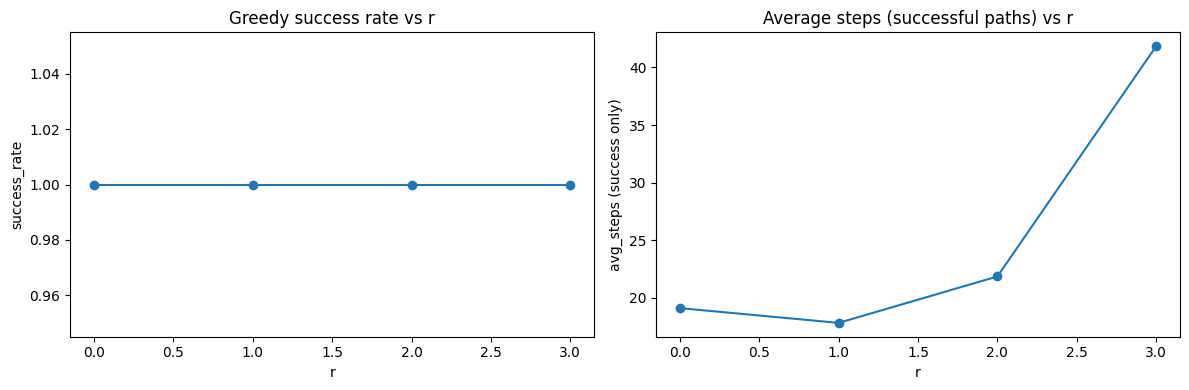

,n,pairs,success_rate,avg_steps_success,avg_time_per_pair_sec,total_time_sec
r,,,,,,
0,150,400,1.0000,19.1000,0.0002,0.0782
1,150,400,1.0000,17.8175,0.0001,0.0555
2,150,400,1.0000,21.8500,0.0002,0.0668
3,150,400,1.0000,41.8450,0.0003,0.1166


In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(results_df.index.values, results_df["success_rate"].values, marker="o")
plt.xlabel("r"); plt.ylabel("success_rate"); plt.title("Greedy success rate vs r")

plt.subplot(1,2,2)
plt.plot(results_df.index.values, results_df["avg_steps_success"].values, marker="o")
plt.xlabel("r"); plt.ylabel("avg_steps (success only)"); plt.title("Average steps (successful paths) vs r")

plt.tight_layout()
plt.show()

results_df


<div dir="rtl">

## سوال 5

- **روند کلی:**  
  با بالا رفتن مقدار `r`، گره‌ها معمولاً لینک‌های دوربرد خودشون رو به گره‌های **نزدیک‌تر** وصل می‌کنن.  
  - وقتی `r = 0` باشه، لینک‌ها کاملاً تصادفی‌اند. بعضی از اون‌ها خیلی بلندن و معمولاً مسیر درستی به مقصد پیدا نمی‌شه، در نتیجه الگوریتم ممکنه **گیر کنه**.  
  - وقتی `r` زیاد می‌شه، لینک‌ها تقریباً فقط به همسایه‌های نزدیک وصل می‌شن، و خاصیت میان‌برها از بین می‌ره، بنابراین مسیرها طولانی‌تر می‌شن.

- **نقطه‌ی بهینه (در شبکه‌ی دوبعدی):**  
  طبق نظریه‌ی کلینبرگ، برای شبکه‌های دوبعدی مقدار **`r = 2`** بهترین عملکرد رو داره.  
  در این حالت بین لینک‌های محلی و میان‌بُرها یه تعادل خوب برقرار می‌شه و جستجو می‌تونه با تعداد گام کم به مقصد برسه.  
  معمولاً توی نتایج آزمایش هم دیده می‌شه که اطراف `r = 2` نرخ موفقیت بالاتر و میانگین گام کمتره،  
  هرچند این مقدار دقیق ممکنه بسته به اندازه‌ی شبکه کمی فرق کنه.

- **جمع‌بندی نهایی:**  
  - `r ≈ 2` → تعادل مناسب بین لینک‌های محلی و میان‌برها (عملکرد بهینه)  
  - `r = 0` → لینک‌ها تصادفی هستن و مسیرها جهت‌دار نیستن  
  - `r = 3` → لینک‌ها خیلی محلی می‌شن، میان‌بُرها از بین می‌رن و مسیرها طولانی‌تر می‌شن  

</div>


<div dir="rtl">

# بخش ۴ — تحلیل پیچیدگی جستجو در شبکهٔ واقعی (Facebook)


</div>


In [28]:
# Work on the largest connected component for well-defined shortest paths
fb_LCC_nodes = max(nx.connected_components(G_fb), key=len)
G = G_fb.subgraph(fb_LCC_nodes).copy()

print("Facebook LCC:")
print("Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())

Facebook LCC:
Nodes: 4039 Edges: 88234


<div dir="rtl">

## تعریف وظیفهٔ جستجو
- **ورودی:** دو گره `s` و `t` در LCC شبکهٔ Facebook
- **هدف:** یافتن مسیر از `s` به `t` با یک **جستجوی BFS محدود به عمق L**
- **تفاوت با BFS استاندارد:** اگر عمق از L بیشتر شود، جستجو متوقف می‌شود (حتی اگر هنوز پیدا نشده باشد)

**اندازه‌گیری‌ها:**
- `success`: آیا مسیر در عمق کمتر یا مساوی L پیدا شد؟
- `nodes_expanded`: تعداد گره‌های بازدید شده
- `time_sec`: زمان اجرای جستجو

**برنامهٔ آزمایش:**
- برای لیستی از عمق‌ها (مثل: 2, 3, 4, 6, 8, 10, 12, 15, 20, 25, 30)
- برای هر عمق، روی چند جفت `(s,t)` تصادفی، تکرار و میانگین‌گیری می‌کنیم.

</div>


In [29]:
from collections import deque

# Choose random source-target pairs from the LCC
num_pairs = 50  # increase for smoother averages if runtime allows
nodes_list = list(G.nodes())
pairs = []

while len(pairs) < num_pairs:
    s = random.choice(nodes_list)
    t = random.choice(nodes_list)
    if s != t:
        pairs.append((s, t))

# Depth limits to test
depth_limits = [2, 3, 4, 6, 8, 10, 12, 15, 20, 25, 30]

len(pairs), depth_limits


(50, [2, 3, 4, 6, 8, 10, 12, 15, 20, 25, 30])

<div dir="rtl">

## اجرای BFS محدود (Depth-Limited BFS)

در این بخش از الگوریتم **جستجوی سطحی (BFS)** استفاده می‌کنیم،
اما فقط تا عمق مشخصی پیش می‌رویم. این کار باعث می‌شود الگوریتم سریع‌تر اجرا شود و از گسترش بی‌پایان جلوگیری شود.

### مراحل اجرای الگوریتم
1. ابتدا مجموعه‌ی بازدیدشده‌ها را مقداردهی می‌کنیم:
   `visited = {s}`
   و صف اولیه را با گره‌ی مبدأ (`s`) و عمق صفر می‌سازیم:
   `queue = [(s, 0)]`
2. تا وقتی صف خالی نشده:
   - یک گره را از صف برمی‌داریم: `(u, d)`
   - اگر `u == t` بود → یعنی به مقصد رسیدیم → **موفقیت**
   - اگر عمق `d` برابر با حد مجاز `L` بود → دیگر به عمق پایین‌تر نمی‌رویم
   - در غیر این‌صورت، همه‌ی **همسایه‌های بازدیدنشده‌ی `u`** را با عمق `d + 1` به صف اضافه می‌کنیم
3. اگر صف تمام شد و هنوز به `t` نرسیدیم → نتیجه **شکست** است (یعنی در این عمق پیدا نشد).

### ثبت نتایج
برای هر جفت گره‌ی مبدأ و مقصد `(s, t)` و هر مقدار عمق `L`، موارد زیر را ذخیره می‌کنیم:
- **زمان اجرا**
- **تعداد گره‌هایی که بازدید شده‌اند**

این اطلاعات به ما کمک می‌کند بفهمیم تا چه عمقی باید جستجو کنیم تا هم سرعت مناسب بماند، هم احتمال موفقیت بالا باشد.

</div>


In [30]:
results = []

for L in depth_limits:
    successes = 0
    nodes_expanded_list = []
    times_list = []

    for (s, t) in pairs:
        # Depth-limited BFS from s to t up to depth L
        visited = set([s])
        dq = deque()
        dq.append((s, 0))

        expanded = 0
        found = False

        t0 = time.perf_counter()

        while dq:
            u, d = dq.popleft()
            expanded += 1

            if u == t:
                found = True
                break

            if d == L:
                continue

            for v in G.neighbors(u):
                if v not in visited:
                    visited.add(v)
                    dq.append((v, d + 1))

        t1 = time.perf_counter()
        times_list.append(t1 - t0)
        nodes_expanded_list.append(expanded)
        if found:
            successes += 1

    avg_time = float(np.mean(times_list))
    avg_expanded = float(np.mean(nodes_expanded_list))
    success_rate = successes / len(pairs)

    results.append({
        "depth_limit": L,
        "pairs": len(pairs),
        "success_rate": success_rate,
        "avg_nodes_expanded": avg_expanded,
        "avg_time_sec": avg_time
    })

results_df = pd.DataFrame(results).set_index("depth_limit")
results_df


,pairs,success_rate,avg_nodes_expanded,avg_time_sec
depth_limit,,,,
2,50,0.1800,631.4200,0.0006
3,50,0.3600,"1,379.9400",0.0035
4,50,0.7600,"2,079.5400",0.0064
6,50,0.9600,"2,236.5600",0.0099
8,50,1.0000,"2,245.9400",0.0100
10,50,1.0000,"2,245.9400",0.0093
12,50,1.0000,"2,245.9400",0.0095
15,50,1.0000,"2,245.9400",0.0090
20,50,1.0000,"2,245.9400",0.0094


<div dir="rtl">

## نمودارهای خلاصه
- **نرخ موفقیت** بر حسب **عمق**
- **میانگین گره‌های بازدیدشده** بر حسب **عمق**
- **میانگین زمان اجرا** بر حسب **عمق**

انتظار داریم با افزایش عمق، نرخ موفقیت به‌سرعت به ۱ نزدیک شود (به‌خاطر خاصیت Small-World) ولی هزینهٔ جستجو (nodes expanded / time) رشد کند.

</div>


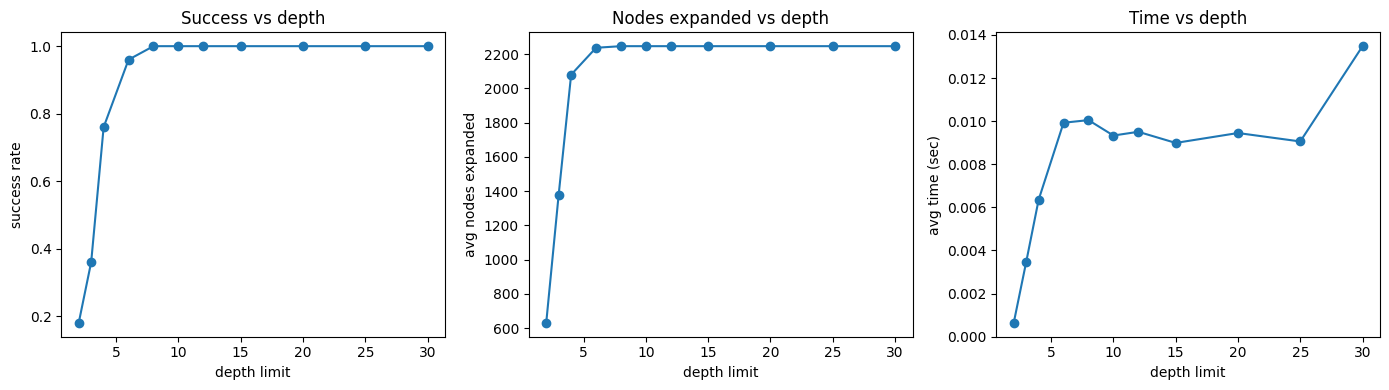

,pairs,success_rate,avg_nodes_expanded,avg_time_sec
depth_limit,,,,
2,50,0.1800,631.4200,0.0006
3,50,0.3600,"1,379.9400",0.0035
4,50,0.7600,"2,079.5400",0.0064
6,50,0.9600,"2,236.5600",0.0099
8,50,1.0000,"2,245.9400",0.0100
10,50,1.0000,"2,245.9400",0.0093
12,50,1.0000,"2,245.9400",0.0095
15,50,1.0000,"2,245.9400",0.0090
20,50,1.0000,"2,245.9400",0.0094


In [31]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.plot(results_df.index.values, results_df["success_rate"].values, marker="o")
plt.xlabel("depth limit"); plt.ylabel("success rate"); plt.title("Success vs depth")

plt.subplot(1,3,2)
plt.plot(results_df.index.values, results_df["avg_nodes_expanded"].values, marker="o")
plt.xlabel("depth limit"); plt.ylabel("avg nodes expanded"); plt.title("Nodes expanded vs depth")

plt.subplot(1,3,3)
plt.plot(results_df.index.values, results_df["avg_time_sec"].values, marker="o")
plt.xlabel("depth limit"); plt.ylabel("avg time (sec)"); plt.title("Time vs depth")

plt.tight_layout()
plt.show()

results_df


<div dir="rtl">

## سوال 4

### روند اصلی
- با زیاد شدن عمق (L)، **نرخ موفقیت** خیلی سریع بالا می‌رود.
  این رفتار با خاصیت **Small-World** در شبکه‌های اجتماعی سازگار است؛ یعنی مسیرهای بین افراد معمولاً کوتاه‌اند.
- **هزینه‌ی جستجو** (مثل میانگین تعداد گره‌های بازدیدشده و زمان اجرا) با عمق رشد می‌کند.
  در BFS محدود، اندازه‌ی frontier تقریباً با **توانِ درجه‌ی مؤثر** رشد می‌کند؛ به‌صورت تقریبی:
  رشد هزینه ≈ b^L
  (در عمل کمی کمتر، چون به‌خاطر خوشه‌بندی، محله‌ها با هم همپوشانی دارند.)

### ارتباط با ساختار شبکه
- **میانگین درجه و ناهمگنی درجه:** هرچه درجه‌ی مؤثر (b) بزرگ‌تر باشد، frontier سریع‌تر بزرگ می‌شود → برای همان عمق، بازدید/زمان بیشتری لازم است.
- **خوشه‌بندی بالا:** باعث همپوشانی زیاد بین همسایه‌ها می‌شود و رشد واقعی frontier را نسبت به b^L کمی کندتر می‌کند.
- **Small-World (مسیرهای کوتاه):** چون مسیرها کوتاه‌اند، عمق‌های نسبتاً کم معمولاً کافی‌اند؛ بعد از یک حد، افزایش L فقط هزینه را زیاد می‌کند و سود چندانی در موفقیت نمی‌دهد.

### جمع‌بندی
- در شبکه‌ی Facebook، به‌خاطر **مسیرهای کوتاه**، عمق‌های کم (مثلاً 6 تا 12، بسته به نمونه‌ها) معمولاً برای موفقیت بالا کافی‌اند.
- چون هزینه با عمق زیاد می‌شود، **بهترین انتخاب** این است که L را کمی بالاتر از فاصله‌ی میانگین بگذاریم تا توازن «موفقیت/هزینه» خوب باشد.
- این نتایج با شهود Small-World و ساختار اجتماعی (خوشه‌بندی بالا + مسیر کوتاه) هم‌خوانی دارد.

</div>


<div dir="rtl">

# بخش 5

### ۱) چرا شبکه‌های واقعی همزمان خوشه‌بندی بالا و قابلیت جستجوی سریع دارند؟

در بیشتر شبکه‌های واقعی مثل شبکه‌های اجتماعی، افراد معمولاً با دوستان، همکاران یا اطرافیان خود گروه‌های کوچک و فشرده‌ای تشکیل می‌دهند. این باعث می‌شود شبکه **خوشه‌بندی بالا** داشته باشد، چون بیشتر ارتباط‌ها درون همین گروه‌ها شکل می‌گیرد.
اما در کنار این، تعداد کمی **ارتباط دوربرد** هم وجود دارد؛ مثلاً دوستی با فردی از شهر دیگر یا همکاری با فردی از کشور دیگر. همین ارتباط‌های پراکنده باعث می‌شوند مسیر بین هر دو نفر در شبکه زیاد طولانی نباشد.
به همین خاطر، شبکه هم محلی و منسجم است، هم قابلیت **دسترسی سریع بین بخش‌های مختلف** را دارد. ترکیب همین دو ویژگی باعث می‌شود اطلاعات، شایعات یا پیام‌ها در چنین شبکه‌هایی خیلی سریع پخش شوند.

---

### ۲) مدل Watts–Strogatz چقدر در شبیه‌سازی شبکه‌های واقعی موفق است؟

مدل واتس–استروگاتز سعی می‌کند ساختار شبکه‌های واقعی را شبیه‌سازی کند.
در این مدل، ابتدا یک گراف منظم ساخته می‌شود و بعد چند یال تصادفی به آن اضافه می‌کنند. نتیجه این است که گراف هنوز **خوشه‌بندی بالا** دارد ولی در عین حال **فاصله‌ی بین گره‌ها کوتاه‌تر** می‌شود.
به همین دلیل، این مدل توانسته پدیده‌ی «دنیای کوچک» را بازتولید کند و ویژگی‌هایی مثل کوتاه بودن مسیرها و تجمع محلی را به‌خوبی نشان دهد.
با این حال، مدل WS کامل نیست؛ چون همه‌ی گره‌ها تقریباً درجه‌ی مشابهی دارند و شبکه‌های واقعی معمولاً این‌طور نیستند — در دنیای واقعی بعضی افراد «هاب» یا گره‌های با ارتباط زیادند.
پس می‌توان گفت مدل WS برای توضیح پدیده‌ی دنیای کوچک موفق است، اما برای نشان دادن ناهمگنی واقعی شبکه‌ها کافی نیست.

---

### ۳) مدل Kleinberg چگونه جستجوی اجتماعی را بهتر توضیح می‌دهد؟

مدل کلینبرگ نشان می‌دهد که فقط داشتن میان‌بر کافی نیست، بلکه **نحوه‌ی پخش میان‌برها با فاصله** اهمیت زیادی دارد.
در این مدل، احتمال اینکه دو گره‌ی دور به هم وصل شوند با `d^{-r}` تعریف می‌شود.
کلینبرگ ثابت کرد که فقط وقتی `r = 2` باشد (در شبکه‌ی دوبعدی)، می‌شود با استفاده از اطلاعات محلی و روش حریصانه، به‌صورت سریع به مقصد رسید.
این مدل توضیح می‌دهد چرا در زندگی واقعی، انسان‌ها می‌توانند فقط با چند واسطه به فردی دوردست برسند؛ مثلاً در «شش درجه جدایی».
در واقع، کلینبرگ به ما نشان می‌دهد که شبکه‌های اجتماعی واقعی نه تصادفی‌اند و نه خیلی محلی — بلکه تعادل خاصی بین این دو دارند که باعث **قابلیت جستجوی بالا** می‌شود.

---

### ۴) ارتباط ویژگی‌های ساختار شبکه با پیچیدگی زمانی جستجو چیست؟

سرعت یا هزینه‌ی جستجو در شبکه بستگی زیادی به شکل و ساختار آن دارد.
وقتی درجه‌ی میانگین یا تنوع ارتباط‌ها زیاد باشد، هر گره به افراد بیشتری وصل است و **فضای جستجو سریع‌تر گسترش می‌یابد**؛ در نتیجه زمان اجرا بیشتر می‌شود.
اما اگر شبکه دارای میان‌برهای مناسب باشد (یعنی ساختار Small-World داشته باشد)، فاصله‌ی میان گره‌ها کم می‌شود و جستجو سریع‌تر انجام می‌گیرد.
از طرف دیگر، خوشه‌بندی زیاد باعث هم‌پوشانی همسایه‌ها می‌شود و رشد جبهه‌ی جستجو را کمی کند می‌کند.
در مجموع، اگر شبکه هم میان‌بر داشته باشد، هم خوشه‌بندی بالا، الگوریتم‌هایی مثل BFS می‌توانند در عمق کم نتایج خوبی بدهند.
در مقابل، اگر شبکه یکنواخت و بدون میان‌بر باشد، پیدا کردن مسیر یا هدف خیلی زمان‌بر خواهد شد.
بنابراین، ساختار شبکه تعیین می‌کند که جستجو چقدر کارآمد باشد.

</div>
